# Zhifeng Liu  2912549136  INF 552  Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

(a) Download and open the Vertebral Column Data Set

In [2]:
path = '/Users/zhifengliu/Desktop/552 HW1/vertebral_column_data/column_2C.dat'
data = pd.read_table(path, header= None, skiprows=[0,1], sep='\s+')
data.columns = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis", "class"]
data = pd.DataFrame(data = data)
print(data)

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               68.83        22.22                  50.09         46.61   
1               69.30        24.65                  44.31         44.64   
2               49.71         9.65                  28.32         40.06   
3               40.25        13.92                  25.12         26.33   
4               53.43        15.86                  37.17         37.57   
5               45.37        10.76                  29.04         34.61   
6               43.79        13.53                  42.69         30.26   
7               36.69         5.01                  41.95         31.68   
8               49.71        13.04                  31.33         36.67   
9               31.23        17.72                  15.50         13.52   
10              48.92        19.96                  40.26         28.95   
11              53.57        20.46                  33.10         33.11   
12              57.30    

In [3]:
data.shape

(308, 7)

(b) i.Make scatterplots of the independent variables in the dataset.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


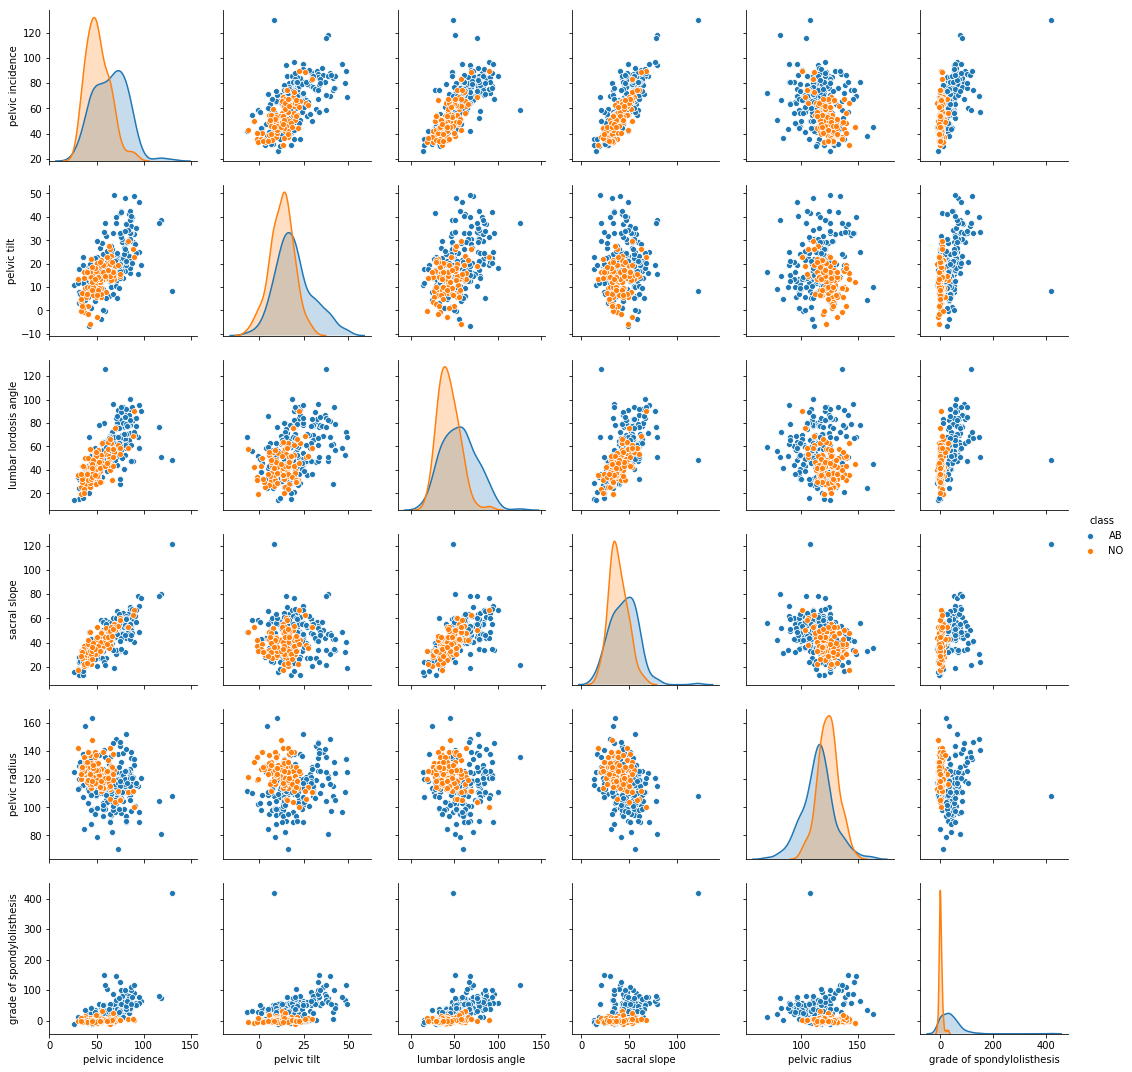

In [4]:
import seaborn as sns
sns.pairplot(data, vars=data.columns[:-1], hue='class')
# seaborn is a data visulization library

(b) ii.Make boxplots for each of the independent variables.

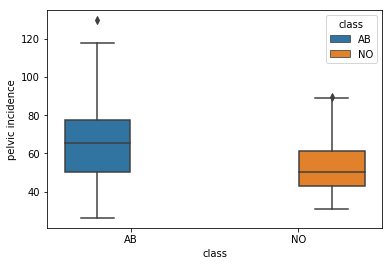

In [5]:
sns.boxplot(x = 'class', y = 'pelvic incidence', data = data, hue = 'class')

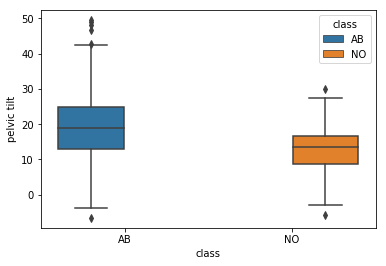

In [6]:
sns.boxplot(x = 'class', y = 'pelvic tilt', data = data, hue = 'class')

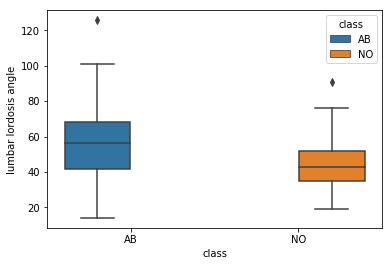

In [7]:
sns.boxplot(x = 'class', y = 'lumbar lordosis angle', data = data, hue = 'class')

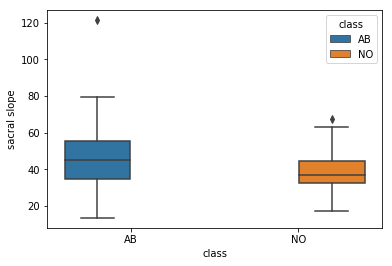

In [8]:
sns.boxplot(x = 'class', y = 'sacral slope', data = data, hue = 'class')

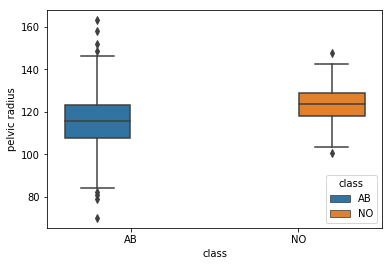

In [9]:
sns.boxplot(x = 'class', y = 'pelvic radius', data = data, hue = 'class')

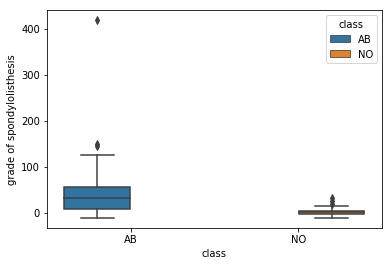

In [10]:
sns.boxplot(x = 'class', y = 'grade of spondylolisthesis', data = data, hue = 'class')

(b) iii. Build and print train dataset and test dataset

In [11]:
classAB = data[data['class']== 'AB']
classNO = data[data['class']== 'NO']
rowAB = classAB.iloc[:, 0].size
rowNO = classNO.iloc[:, 0].size
ABtrain = classAB.head(140)
ABtest = classAB.tail(rowAB-140)
NOtrain = classNO.head(70)
NOtest = classNO.tail(rowNO-70)
combine1 = [ABtrain,NOtrain]
traindata = pd.concat(combine1)
traindata = traindata.reset_index(drop=True)
combine2 = [ABtest,NOtest]
testdata = pd.concat(combine2)
testdata = testdata.reset_index(drop=True)
print(traindata)
print(testdata)

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               68.83        22.22                  50.09         46.61   
1               69.30        24.65                  44.31         44.64   
2               49.71         9.65                  28.32         40.06   
3               40.25        13.92                  25.12         26.33   
4               53.43        15.86                  37.17         37.57   
5               45.37        10.76                  29.04         34.61   
6               43.79        13.53                  42.69         30.26   
7               36.69         5.01                  41.95         31.68   
8               49.71        13.04                  31.33         36.67   
9               31.23        17.72                  15.50         13.52   
10              48.92        19.96                  40.26         28.95   
11              53.57        20.46                  33.10         33.11   
12              57.30    

(c) i. Write code for k-nearest neighbors
    ii. decide which k∗ is the most suitable k among those values

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#using sklearn package to call different KNN model
k = 210
bestK = 0
bestscore = 0
train_x = traindata[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']]
train_y = traindata['class']
test_x = testdata[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']]
test_y = testdata['class']
while k > 0:
    knn = KNeighborsClassifier(n_neighbors= k, p=2)
    # when the parameter p=2, the model is k-nearest neighbors with Euclidean metric
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    # the score function can output the accuracy rate of predicting the test dataset in the model
    if score > bestscore:
        bestscore = score
        bestK = k
    k = k - 3
print("best K:", bestK)
print("best score:", score)

best K: 3
best score: 0.9183673469387755


(c) ii. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } 

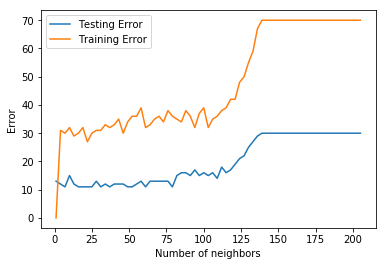

In [13]:
k_distance = np.arange(1,208,3)
#create a k list, the intervel is 3 
train_error =np.empty(len(k_distance))
test_error = np.empty(len(k_distance))
for i,k in enumerate(k_distance):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    knn.fit(train_x, train_y)
    train_error[i] = (1 - knn.score(train_x, train_y, sample_weight = None))*210
    # train errors is equal to the sample of train data multiplies one minus the training accuracy rate
    test_error[i] = (1 - knn.score(test_x, test_y, sample_weight = None))*98
    # test errors is equal to the sample of test data multiplies one minus the testing accuracy rate
plt.xlabel('Number of neighbors')
plt.ylabel('Error')    
plt.plot(k_distance, test_error, label='Testing Error')
plt.plot(k_distance, train_error, label='Training Error')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The result of confusion matrix when set the most suitable k

In [15]:
knn = KNeighborsClassifier(n_neighbors= 3, p=2)
knn.fit(train_x, train_y)
predict = knn.predict(test_x)
confusion = confusion_matrix(test_y,predict)
print("Confusion matrix:", confusion)

Confusion matrix: [[67  1]
 [ 7 23]]


The result of classifcation report that contain the information of classification precision and F-score

In [16]:
print("Classification report:")
print(classification_report(test_y, predict))

Classification report:
             precision    recall  f1-score   support

         AB       0.91      0.99      0.94        68
         NO       0.96      0.77      0.85        30

avg / total       0.92      0.92      0.92        98



The result of true positive rate and true negative rate

In [17]:
TPR = confusion[0,0] / (confusion[0,0]+confusion[0,1])
print("True postive rate:", TPR)
TNR = confusion[1,1] / (confusion[1,0]+confusion[1,1])
print("True negative rate:", TNR)

True postive rate: 0.9852941176470589
True negative rate: 0.7666666666666667


(c)iii. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.

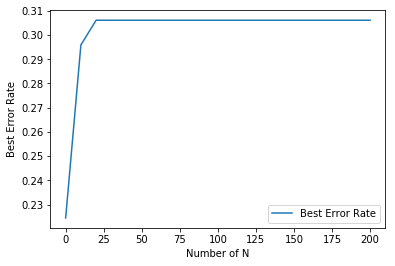

In [18]:
N = 10
n_distance = np.arange(0,210,10)
# create a N list, the intervel is 10
best_error_rate = np.empty(len(n_distance))
k2 = 1
i = 0
while N <= 210:
    ABtrain2 = classAB.head(N - int(N / 3))
    NOtrain2 = classNO.head(int(N / 3))
    combine = [ABtrain2,NOtrain2]
    traindata2 = pd.concat(combine)
    train_x2 = traindata2[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']]
    train_y2 = traindata2['class']
    bestk2 = 0
    bestscore2 = 0
    while k2 < N:
        knn = KNeighborsClassifier(n_neighbors= k2, p=2)
        knn.fit(train_x2, train_y2)
        score2=knn.score(test_x,test_y,sample_weight=None)
        if score2 > bestscore2:
            bestscore2 = score2
            bestk2 = k2
        k2 = k2 + 5
    best_error_rate[i] = 1 - bestscore2 
    i = i + 1
    N = N + 10
plt.plot(n_distance, best_error_rate, label='Best Error Rate')
plt.xlabel('Number of N')
plt.ylabel('Best Error Rate')
plt.legend()
plt.show()

(d) i.A. Replace the Euclidean metric with Manhattan metric, select the best k and calculate the test errors.

In [19]:
k = 1
bestk_A = 1
bestscore_A = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=1)
    #when p=1, the k-nearest neighbors model uses Manhattan Distance
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > bestscore_A:
        bestscore_A = score
        bestk_A = k
    k = k + 5
test_errors_A = (1-bestscore_A)*98
print("bestk_A:", bestk_A)
print("bestscore_A:", bestscore_A)
print("test_error_A:", test_errors_A)

bestk_A: 11
bestscore_A: 0.8877551020408163
test_error_A: 11.000000000000002


(d) i.B. Use the best k found for the Manhattan distance. What is the best log10(p)?

In [20]:
l = 0.1
best_l = 0
bestscore_B = 0
while l <= 1:
    knn = KNeighborsClassifier(n_neighbors= 11, metric = 'minkowski', p=pow(10,l))
    knn.fit(train_x, train_y)
    score_B=knn.score(test_x,test_y,sample_weight=None)
    if score_B > bestscore_B:
        bestscore_B = score_B
        best_l = l
    l = l + 0.1
test_errors_B = (1-bestscore_B)*98
print("test_error_B", test_errors_B)
print("best log10(p):", l)
print("bestscore_B", bestscore_B)

test_error_B 11.000000000000002
best log10(p): 1.0999999999999999
bestscore_B 0.8877551020408163


(d) i.C. Use Chebyshev Distance for training and find the best k.

In [21]:
k = 1
bestscore_c = 0
bestk_c = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'))
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > bestscore_c:
        bestscore_c = score
        bestk_c = k
    k = k + 5
test_errors_c = (1-bestscore_c)*98
print("test_error_c", test_errors_c)
print("bestscore_C:", bestscore_c)
print("bestk_C:", bestk_c)

test_error_c 11.000000000000002
bestscore_C: 0.8877551020408163
bestk_C: 21


(d) ii. Replace metric with Mahalanobis Distance and select the best k.

In [22]:
k = 1
bestk_M = 1
bestscore_M = 0
while k <= 196:
    X = np.linalg.pinv(train_x.cov())
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'mahalanobis',metric_params={'V': X})
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > bestscore_M:
        bestscore_M = score
        bestk_M = k
    k = k + 5
test_error_M = (1-bestscore_M)*98
print("bestk_M:", bestk_M)
print("test_error_M:", test_error_M)
print("bestscore_M:", bestscore_M)

bestk_M: 11
test_error_M: 9.0
bestscore_M: 0.9081632653061225


The result table for the summary of three different distance metric.

In [23]:
results = {'Distance':['Manhattan','Chebyshev','Mahalanobis'],'BestK':[bestk_A,bestk_c,bestk_M],'TestErrors':[test_errors_A,test_errors_c,test_error_M]}
table = pd.DataFrame(results)
print(table)

      Distance  BestK  TestErrors
0    Manhattan     11        11.0
1    Chebyshev     21        11.0
2  Mahalanobis     11         9.0


(e)Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [24]:
k = 1
bestk_euc = 1
bestscore_euc = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=2, weights = 'distance')
    #knn in Euclidean distance
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > bestscore_euc:
        bestscore_euc = score
        bestk_euc = k
    k = k + 5
test_errors_euc = (1-bestscore_euc)*98

In [25]:
k = 1
bestk_man = 1
bestscore_man = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=1, weights = 'distance')
    #knn in Manhattan distance
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > bestscore_man:
        bestscore_man = score
        bestk_man = k
    k = k + 5
test_errors_man = (1-bestscore_man)*98

In [26]:
k = 1
bestk_che = 1
bestscore_che = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'), weights = 'distance')
    #knn in Chebyshev distance
    knn.fit(train_x, train_y)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > bestscore_che:
        bestscore_che = score
        bestk_che = k
    k = k + 5
test_errors_che = (1-bestscore_che)*98

The result table of best k and test errors of weight decision in three different distances.

In [27]:
results2 =  {'Distance':['Euclidean','Manhattan','Chebyshev'],'BestK':[bestk_euc,bestk_man,bestk_che],'TestErrors':[test_errors_euc,test_errors_man,test_errors_che]}
table2 = pd.DataFrame(results2)
print(table2)

    Distance  BestK  TestErrors
0  Euclidean      6         9.0
1  Manhattan      6         9.0
2  Chebyshev     16        11.0


(f) What is the lowest training error rate you achieved in this exercise?
    In this exercise, the lowest training error rate is 0.081633, when the model is k-nearest neighbors with Euclidean     metric with the k is 3 and using the all selected training data.